In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tf_lib 
from tqdm import tqdm
from CVAE import cvae_trainer, models

In [3]:
def preproc(x):
    return x > 0

In [4]:
hparams = tf.contrib.training.HParams(
    num_val=None,
    num_labels=None,
    batch_size=64,
    latent_dim=200,
    debug=True,
    log_dir='logs',
    experiment_name='test_quadrant',
    condition_size=(28, 28),
    target_size=(28, 28),
    num_hidden=1000,
    epochs=20,
    lr=1e-3,
    log_freq=20,
    preproc=preproc,
)

In [5]:
train_data, val_data, test_data = tf_lib.loaders.load_mnist(**hparams.values())

[*] Created dataset: train: 60000 (60000.0 labeled), val: 10000, test: 10000


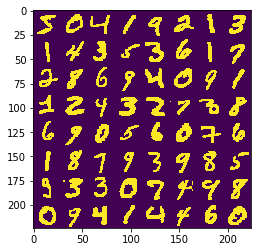

In [6]:
image = tf_lib.utils.visualize_images(train_data[0][:64] * 255)
plt.imshow(image)

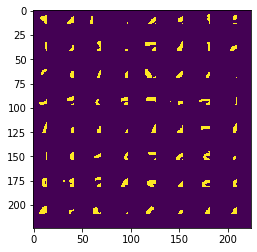

In [7]:
quadrants = cvae_trainer.quadrant_tl(train_data[0][:64]) * 255
quadrants = tf_lib.utils.visualize_images(quadrants)
plt.imshow(quadrants)

In [8]:
model = {
    'prior_net': models.PriorNetwork(hparams),
    'posterior_net': models.PosteriorNetwork(hparams),
    'generator_net': models.GenerationNetwork(hparams),
}

W0820 17:14:49.433033 4400006592 deprecation.py:506] From /Users/laetitia/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
session = tf.Session()
trainer = cvae_trainer.CVAE(session, model, hparams, tf_lib.loaders.load_mnist, lambda d: cvae_trainer.quadrant_tl(d[0]))

[*] Created dataset: train: 60000 (60000.0 labeled), val: 10000, test: 10000


W0820 17:14:52.044638 4400006592 deprecation.py:323] From /Users/laetitia/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
trainer.train()

W0820 17:14:54.603068 4400006592 deprecation_wrapper.py:119] From /Users/laetitia/workspace/CVAE/tf_lib/trainer.py:54: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.

W0820 17:14:55.102339 4400006592 deprecation_wrapper.py:119] From /Users/laetitia/workspace/CVAE/tf_lib/trainer.py:111: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.

W0820 17:14:55.118576 4400006592 deprecation_wrapper.py:119] From /Users/laetitia/workspace/CVAE/tf_lib/trainer.py:112: The name tf.train.Saver is deprecated. Please use tf.compat.v1.train.Saver instead.

W0820 17:14:55.288901 4400006592 deprecation_wrapper.py:119] From /Users/laetitia/workspace/CVAE/tf_lib/trainer.py:79: The name tf.train.NewCheckpointReader is deprecated. Please use tf.compat.v1.train.NewCheckpointReader instead.

W0820 17:14:55.291496 4400006592 deprecation_wrapper.py:119] From /Users/laetitia/workspace/CVAE/tf_lib/trainer.py:88: The name tf

 [*] Reading checkpoints from logs/test_quadrant
Loading and saving variables ... 
---------
Variables: name (type shape) [size]
---------
prior_network/dense/kernel:0 (float32 784x1000) [784000, bytes: 3136000]
prior_network/dense/bias:0 (float32 1000) [1000, bytes: 4000]
prior_network/dense_1/kernel:0 (float32 1000x1000) [1000000, bytes: 4000000]
prior_network/dense_1/bias:0 (float32 1000) [1000, bytes: 4000]
prior_network/dense_2/kernel:0 (float32 1000x200) [200000, bytes: 800000]
prior_network/dense_2/bias:0 (float32 200) [200, bytes: 800]
prior_network/dense_3/kernel:0 (float32 1000x200) [200000, bytes: 800000]
prior_network/dense_3/bias:0 (float32 200) [200, bytes: 800]
posterior_network/dense_4/kernel:0 (float32 1568x1000) [1568000, bytes: 6272000]
posterior_network/dense_4/bias:0 (float32 1000) [1000, bytes: 4000]
posterior_network/dense_5/kernel:0 (float32 1000x1000) [1000000, bytes: 4000000]
posterior_network/dense_5/bias:0 (float32 1000) [1000, bytes: 4000]
posterior_network

W0820 17:14:55.365994 4400006592 deprecation.py:323] From /Users/laetitia/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


 [*] Success to read test_quadrant.model-18760
18760
 [*] Load SUCCESS
Experiment name test_quadrant
[*] Saved model in logs/test_quadrant


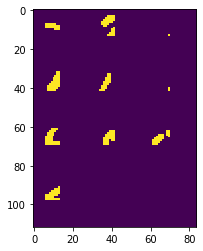

In [11]:
conditions = cvae_trainer.quadrant_tl(test_data[0][:10])
image_condition = tf_lib.utils.visualize_images(conditions * 255)
plt.imshow(image_condition)

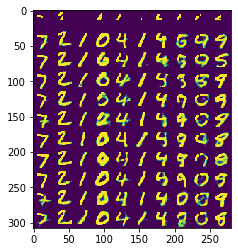

In [12]:
conditions_ = np.concatenate([conditions for i in range(10)], axis=0)
logits = trainer.generate_samples(conditions_)
image = tf_lib.utils.visualize_images(np.concatenate([conditions*255,logits * 255], axis=0))
plt.imshow(image)

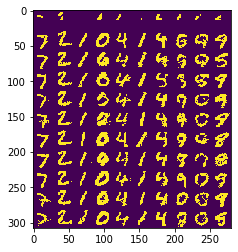

In [14]:
image = np.random.uniform(size=logits.shape)
image = tf_lib.utils.visualize_images(np.concatenate([conditions*255, (image < logits) * 255], axis=0))
plt.imshow(image)

In [15]:
x = test_data[0][:64]
conditions = cvae_trainer.quadrant_tl(x)
trainer.importance_sampling(conditions, x)

53.497066

In [ ]:
trainer.eval()

  0%|          | 0/157 [00:00<?, ?it/s]